Initial rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  

Summary statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%    

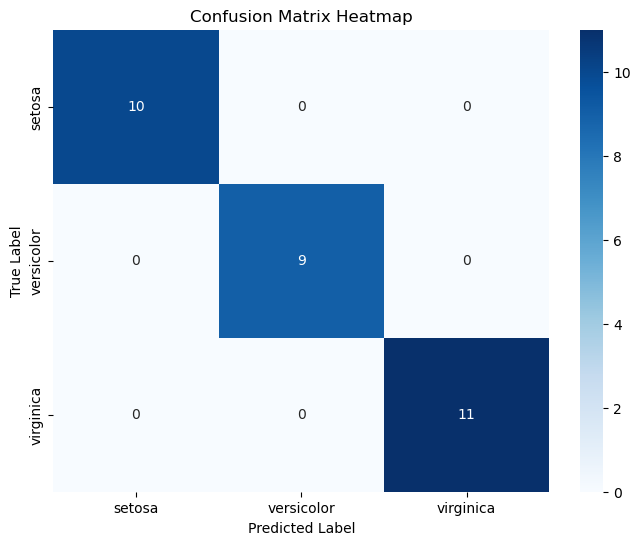

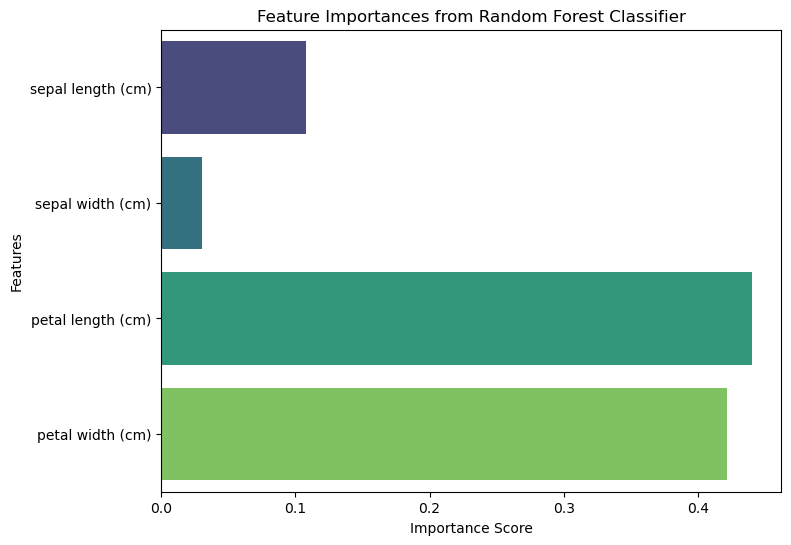

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

iris_data = load_iris()
data_frame = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
data_frame['species'] = iris_data.target
print("Initial rows of the dataset:")
print(data_frame.head())

print("\nSummary statistics:")
print(data_frame.describe())

features = data_frame.iloc[:, :-1]  
target = data_frame['species']    
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(features_train, target_train)
predictions = model.predict(features_test)

print("\nAccuracy on test data:", accuracy_score(target_test, predictions))

print("\nClassification Report:")
print(classification_report(target_test, predictions, target_names=iris_data.target_names))

print("\nConfusion Matrix:")
confusion_mat = confusion_matrix(target_test, predictions)
print(confusion_mat)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=iris_data.target_names, yticklabels=iris_data.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

feature_importances = model.feature_importances_
features_list = iris_data.feature_names

plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importances, y=features_list, palette='viridis')

plt.title('Feature Importances from Random Forest Classifier')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()
